In [3]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
#warnings.simplefilter(action='ignore', category=np.VisibleDeprecationWarning)

## Comparison ##

In [ ]:
3 > 5

In [ ]:
3 >= 3

In [ ]:
type(3 > 1)

In [ ]:
True

In [ ]:
true

(We see that capitalization matters.)

In [ ]:
3 = 3

In [ ]:
3 == 3

In [ ]:
10 != 2

In [26]:
x = 14
y = 3

In [ ]:
x > 15

In [ ]:
12 < x

In [ ]:
x < 20

In [ ]:
12 < x < 20

In [ ]:
12 < x and 50 < x

In [ ]:
12 < x or 50 < x

In [ ]:
not(x > 50)

In [ ]:
10 < x-y < 13

In [ ]:
x > 13 and y < 3.14159

(The comparison `12 < x < 20` is equivalent to `12 < x and x < 20`.)

## Comparisons with arrays

In [34]:
pets = make_array('cat', 'cat', 'dog', 'cat', 'dog', 'rabbit')

In [ ]:
pets == 'cat'

In [ ]:
1 + 1 + 0 + 1 + 0 + 0

In [ ]:
sum(make_array(True, True, False, True, False, False))

In [ ]:
sum(pets == 'dog')

In [ ]:
sum(pets == 'dog') / len(pets)

In [ ]:
np.count_nonzero(pets == 'dog')

In [ ]:
x = np.arange(20, 31)
print(x)

In [ ]:
x >= 28

In [ ]:
sum(x >= 28)

## Conditional Statements

In [47]:
x = 2

In [ ]:
if x >= 18:
    print('You can legally vote.')
    print('Go vote soon.')

print('End of if')

In [20]:
if x >= 21:
    print('You can legally drink.')

In [54]:
def age(x):
    if x >= 18:
        return 'You can legally vote.'
    if x >= 21:
        return 'You can legally drink.'

In [55]:
age(3)

In [ ]:
age(20)

In [ ]:
age(25)

In [59]:
def age(x):
    if x >= 21:
        return 'You can legally vote and drink.'
    elif x >= 18:
        return 'You can legally vote.'
    else:
        return 'You can legally drink milk.'

In [ ]:
age(3)

In [ ]:
age(20)

In [ ]:
age(23)

In [ ]:
trip = Table().read_table('trip.csv')
trip.show(3)

In [ ]:
def trip_kind(start, end):
    if start == end:
        return 'round trip'
    else:
        return 'one way'

kinds = trip.with_column('Trip Kind', trip.apply(trip_kind, 'Start Station', 'End Station'))
kinds.show(3)

In [ ]:
kinds.where('Duration', are.below(600)).pivot('Trip Kind', 'Start Station')

## Simulation

Let's play a game: we each roll a die. 

If my number is bigger: you pay me a dollar.

If they're the same: we do nothing.

If your number is bigger: I pay you a dollar.

Steps:
1. Find a way to simulate two dice rolls.
2. Compute how much money we win/lose based on the result.
3. Do steps 1 and 2 10,000 times.

### Conditional Statements

In [10]:
# Work in progress
def one_round(my_roll, your_roll):
    if my_roll > your_roll:
        return 1

In [ ]:
one_round(4, 3)

In [ ]:
one_round(2, 6)

In [ ]:
# Final correct version
def one_round(my_roll, your_roll):
    if my_roll > your_roll:
        return 1
    elif your_roll > my_roll:
        return -1
    elif your_roll == my_roll:
        return 0

In [ ]:
one_round(1, 1)

In [ ]:
one_round(6, 5)

In [ ]:
one_round(7, -1)

### Random Selection

In [6]:
mornings = make_array('wake up', 'sleep in')

In [ ]:
np.random.choice(mornings)

In [ ]:
np.random.choice(mornings)

In [ ]:
np.random.choice(mornings)

We can also pass an argument that specifies how many times to make a random choice:

In [ ]:
np.random.choice(mornings, 7)

In [ ]:
sum(np.random.choice(mornings, 7) == 'wake up')

In [ ]:
sum(np.random.choice(mornings, 7) == 'sleep in')

In [ ]:
morning_week = np.random.choice(mornings, 7)
morning_week

In [ ]:
sum(morning_week == 'wake up')

In [ ]:
sum(morning_week == 'sleep in')

### Simulating the roll of a die

In [6]:
die_faces = np.arange(1, 7)

In [ ]:
np.random.choice(die_faces)

In [8]:
def simulate_one_round():
    my_roll = np.random.choice(die_faces)
    your_roll = np.random.choice(die_faces)
    return one_round(my_roll, your_roll)

In [11]:
simulate_one_round()

### Appending Arrays

In [26]:
first = np.arange(4)
second = np.arange(10, 17)

In [ ]:
np.append(first, 6)

In [ ]:
first

In [ ]:
np.append(first, second)

In [ ]:
first

In [ ]:
second

### Repeated Betting ###

In [ ]:
results = make_array()

In [ ]:
results = np.append(results, simulate_one_round())
results

In [ ]:
results = np.append(results, simulate_one_round())
results

## `For` Statements

In [ ]:
# Loop over every element of array
pet_arr = make_array('cat', 'dog', 'rabbit')

for pet in pet_arr:
    print('I love my ' + pet)
    print(pet + 's are cute')

print('End of animal talk')

In [ ]:
pet = make_array('cat', 'dog', 'rabbit').item(0)
print('I love my ' + pet)

pet = make_array('cat', 'dog', 'rabbit').item(1)
print('I love my ' + pet)

pet = make_array('cat', 'dog', 'rabbit').item(2)
print('I love my ' + pet)

In [ ]:
# Counting the number of times something happens
pet_array = make_array('cat', 'dog', 'rabbit', 'rabbit', 'cat', 'cat', 'dog', 'dog', 'dog', 'cat', 'dinosaur')

num_cats = 0
num_dogs = 0
num_rabbits = 0
num_other = 0

for pet in pet_array:
    if pet == 'cat':
        num_cats = num_cats + 1
    elif pet == 'dog':
        num_dogs = num_dogs + 1
    elif pet == 'rabbit':
        num_rabbits = num_rabbits + 1
    else:
        num_other = num_other + 1

print(num_cats, num_dogs, num_rabbits, num_other)

In [ ]:
# Loop a specified number of times
for i in np.arange(5):
    print('Hello')
    print(i)

In [ ]:
game_outcomes = make_array()

for i in np.arange(5):
    game_outcomes = np.append(game_outcomes, simulate_one_round())
    
game_outcomes

In [ ]:
game_outcomes = make_array()

for i in np.arange(10000):
    game_outcomes = np.append(game_outcomes, simulate_one_round())
    
game_outcomes

In [ ]:
len(game_outcomes)

In [ ]:
results = Table().with_column('My winnings', game_outcomes)

In [ ]:
results

In [ ]:
results.group('My winnings').barh('My winnings')

### Another example: simulating heads in 100 coin tosses

In [4]:
coin = make_array('heads', 'tails')

In [ ]:
sum(np.random.choice(coin, 100) == 'heads')

In [6]:
# Simulate one outcome

def num_heads():
    return sum(np.random.choice(coin, 100) == 'heads')

In [19]:
# Decide how many times you want to repeat the experiment

repetitions = 100000

In [22]:
# Simulate that many outcomes

outcomes = make_array()

for i in np.arange(repetitions):
    outcomes = np.append(outcomes, num_heads())

In [ ]:
heads = Table().with_column('Heads', outcomes)
heads.hist(bins = np.arange(29.5, 70.6))

## Optional: Monty Hall Problem ##

In [25]:
goats = make_array('first goat', 'second goat')

def other_goat(x):
    if x == 'first goat':
        return 'second goat'
    elif x == 'second goat':
        return 'first goat'
    
def monty_hall_game():
    """Return 
    [contestant's guess, what Monty reveals, what remains behind the other door]"""
    
    contestant_guess = np.random.choice(make_array('first goat', 'second goat', 'car'))
    
    if contestant_guess == 'first goat':
        return [contestant_guess, 'second goat', 'car']
    
    if contestant_guess == 'second goat':
        return [contestant_guess, 'first goat', 'car']
    
    if contestant_guess == 'car':
        revealed = np.random.choice(goats)
        return [contestant_guess, revealed, other_goat(revealed)]

In [30]:
for i in np.arange(10):
    print(monty_hall_game())

['first goat', 'second goat', 'car']
['first goat', 'second goat', 'car']
['second goat', 'first goat', 'car']
['car', 'second goat', 'first goat']
['second goat', 'first goat', 'car']
['first goat', 'second goat', 'car']
['first goat', 'second goat', 'car']
['first goat', 'second goat', 'car']
['car', 'second goat', 'first goat']
['second goat', 'first goat', 'car']


In [32]:
# empty collection table
games = Table(['Guess', 'Revealed', 'Remaining'])

# Play the game 10000 times and 
# record the results in the table games

for i in np.arange(10000):
    games.append(monty_hall_game())

games.show(10)

Guess,Revealed,Remaining
car,first goat,second goat
first goat,second goat,car
second goat,first goat,car
first goat,second goat,car
car,second goat,first goat
first goat,second goat,car
car,first goat,second goat
first goat,second goat,car
car,first goat,second goat
car,first goat,second goat


In [35]:
original_choice = games.group('Guess')
original_choice

Guess,count
car,3339
first goat,3366
second goat,3295


In [34]:
remaining_door = games.group('Remaining')
remaining_door

Remaining,count
car,6661
first goat,1650
second goat,1689


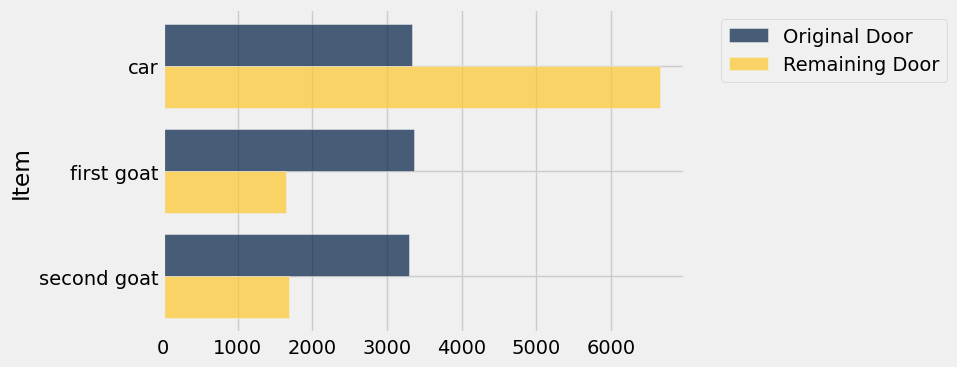

In [43]:
joined = original_choice.join('Guess', remaining_door, 'Remaining')
combined = joined.relabeled(0, 'Item').relabeled(1, 'Original Door').relabeled(2, 'Remaining Door')
combined.barh('Item')

## Optional: Advanced `where` ##

In [22]:
ages = make_array(16, 22, 18, 15, 19, 15, 16, 21)
age = Table().with_column('Age', ages)

In [ ]:
age

In [ ]:
age.where('Age', are.above_or_equal_to(18))

In [25]:
voter = ages >= 18

In [ ]:
voter

We are extracting rows from `age` based on whether its corresponding entry in `voter` is `True`.

In [ ]:
age.where(voter)

In [ ]:
is_voter = are.above_or_equal_to(18)

In [ ]:
type(is_voter)

In [ ]:
is_voter(22)

In [ ]:
is_voter(3)

In [ ]:
age.apply(is_voter, 'Age')

In [ ]:
ages >= 18

In [ ]:
voter

In [ ]:
def my_voter_function(x):
    return x >= 18

In [ ]:
age.where('Age', are.above_or_equal_to(18))

In [ ]:
age.where(voter)

In [ ]:
age.where('Age', my_voter_function)